Exploratory Data Analysis (EDA)

In [2]:
# Import necessary libraries and initialize dataset
import matplotlib.pyplot as plt
from s3torchconnector import S3IterableDataset
from io import BytesIO
from PIL import Image
import torch
from PIL import ImageFile

DATASET_URI = "s3://cancer-classification-data-bucket/BreaKHis_Total_dataset/"
REGION = "us-east-1"

dataset = S3IterableDataset.from_prefix(DATASET_URI, region=REGION)

Total number of images in dataset:  7783


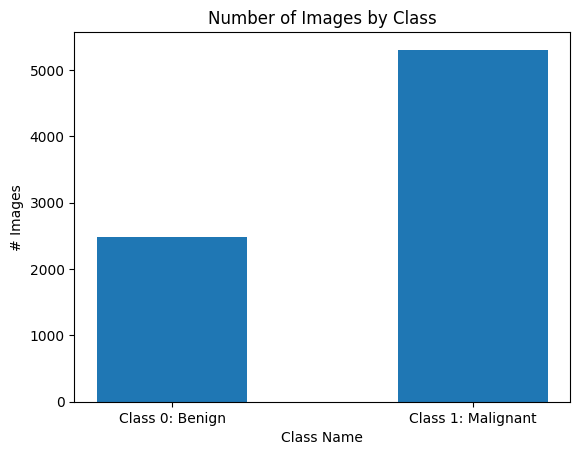

In [35]:
# Count number of images in each class and plot bar graph

lenBenign = 0
lenMalignant = 0
for data in dataset:
    if (data.key.find("benign") != -1):
        lenBenign += 1
    else:
        lenMalignant += 1

num_classes = {'Class 0: Benign': lenBenign, 'Class 1: Malignant': lenMalignant}
print("Total number of images in dataset: ", lenBenign + lenMalignant)
plt.bar(num_classes.keys(), num_classes.values(), width = .5)
plt.title("Number of Images by Class")
plt.xlabel('Class Name')
plt.ylabel('# Images')
plt.show()

Based on the bar graph above, we clearly have a higher proportion of malignant cancerous cells than benign cancerous cells. We have to take this into consideration when designing our CNN models because the model may end up overfitting to the malignant cells, impacting our evaluation metrics. Techniques such as class weighting or oversampling of the benign class can be used to prevent overfitting.

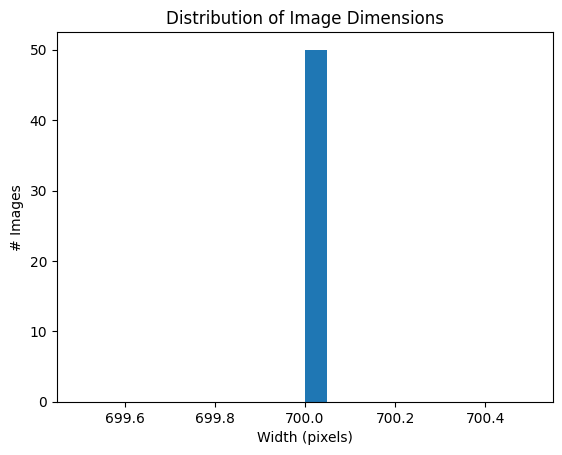

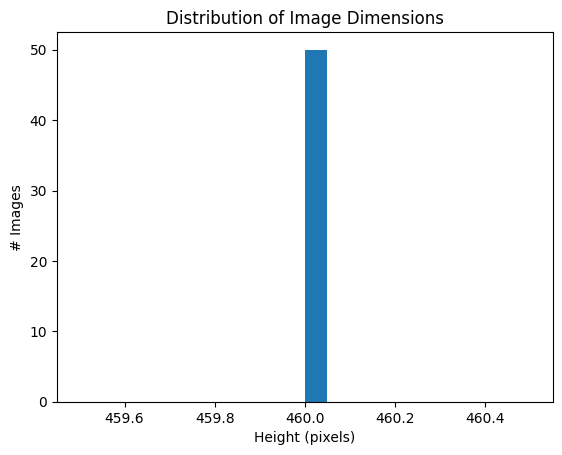

In [36]:
# Plot the distribution of image dimensions to check for consistency
# Sequential processing of all images would take too long so we can take a random sample from the dataset

image_widths = []
image_heights = []
random_ints = torch.randint(0, 7783, (50,)).tolist()
i = 0
for data in dataset:
    if (i in random_ints):
        img = Image.open(BytesIO(data.read()))
        width, height = img.size
        image_widths.append(width)
        image_heights.append(height)
    i += 1

plt.hist(image_widths, bins = 20)
plt.title("Distribution of Image Dimensions")
plt.xlabel('Width (pixels)')
plt.ylabel('# Images')
plt.show()

plt.hist(image_heights, bins = 20)
plt.title("Distribution of Image Dimensions")
plt.xlabel('Height (pixels)')
plt.ylabel('# Images')
plt.show()

From this random sample of images, we can see that the image dimensions are consistent across the dataset. The width of all 50 samples was about 700 pixels. All images had a height of approximately 460 pixels. Even if there were differences, they would not significant to the CNN models because we will resize the images during preprocessing regardless.

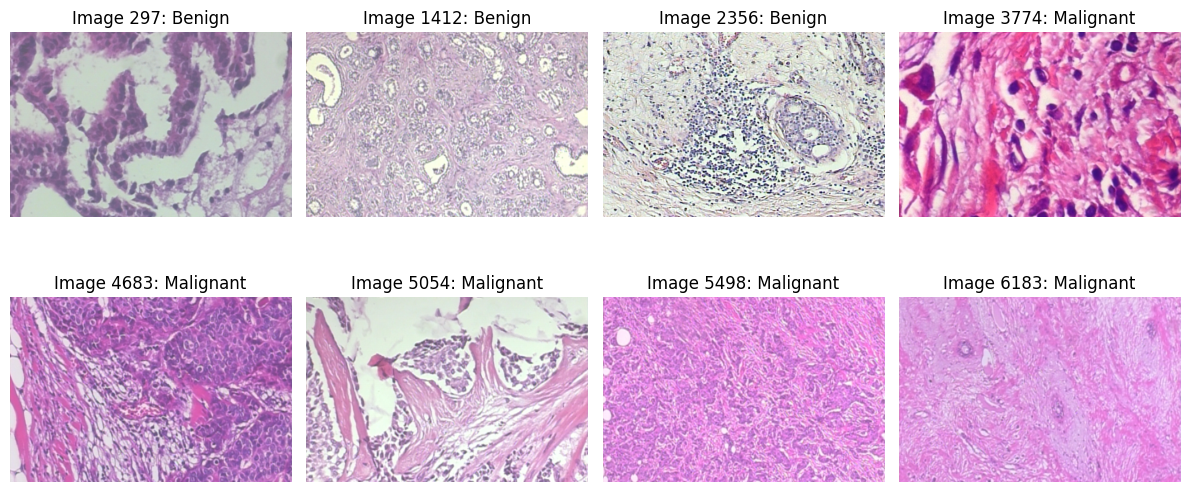

In [7]:
# Print out a random sample of 8 images from the dataset

#Creates random integers to select images from dataset
random_ints = torch.randint(0, 7783, (8,)).tolist()
i = 0

# Create subplots to display images in a 2x4 grid
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
width_index = 0
height_index = 0
for data in dataset:
    if (i in random_ints):

        img = Image.open(BytesIO(data.read()))
        axs[width_index, height_index].imshow(img)
        axs[width_index, height_index].axis('off')
        if (data.key.find("benign") != -1):
            axs[width_index, height_index].set_title(f"Image {i}: Benign")
        else:
            axs[width_index, height_index].set_title(f"Image {i}: Malignant")
        height_index += 1

    if (height_index >= 4):
        width_index += 1
        height_index = 0
    if (width_index >= 2):
        break
    i += 1
plt.tight_layout()
plt.show()

Upon sampling 8 random images from the dataset, I observed a difference in brightness between benign and malignant images. This could potentially affect the CNN model, causing it to overfit to brightness differences rather than learning the underlying cellular structures that determine malignancy. To mitigate this, I plan to apply normalization during preprocessing, which will remove these brightness variations and help the model focus on meaningful features.